In [61]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import datetime
%matplotlib inline

In [96]:
df = pd.read_csv('googleplaystore.csv')

In [97]:
df.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


In [98]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10841 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             10841 non-null  object 
 1   Category        10841 non-null  object 
 2   Rating          9367 non-null   float64
 3   Reviews         10841 non-null  object 
 4   Size            10841 non-null  object 
 5   Installs        10841 non-null  object 
 6   Type            10840 non-null  object 
 7   Price           10841 non-null  object 
 8   Content Rating  10840 non-null  object 
 9   Genres          10841 non-null  object 
 10  Last Updated    10841 non-null  object 
 11  Current Ver     10833 non-null  object 
 12  Android Ver     10838 non-null  object 
dtypes: float64(1), object(12)
memory usage: 1.1+ MB


In [99]:
df.describe()

,Rating
count,9367.000000
mean,4.193338
std,0.537431
min,1.000000
25%,4.000000
50%,4.300000
75%,4.500000
max,19.000000


In [101]:
# arranging line 10472
for i in range((df.shape[1] - 1), 0, -1):
    df.iloc[10472, i] = df.iloc[10472, (i - 1)]
    df.iloc[10472, 1] = np.nan

In [102]:
df["Current Ver"].isna().sum()

8

In [103]:
df.drop(["Current Ver"], inplace=True, axis=1)

In [104]:
df.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",4.4 and up


In [105]:
def explore_dataset(df, start, end, numRowCol = False):
    data = df.loc[start:end].values
    for row in data:
        print(row)
    if numRowCol:
        print("The number of rows in the dataset is : ", df.shape[0])
        print("The number of cols in the dataset is : ", df.shape[1])

## <font color=black>Function to explore the dataset. We have to provide the dataset, starting index, ending index as inputs</font>

In [106]:
explore_dataset(df, 0, 3)

['Photo Editor & Candy Camera & Grid & ScrapBook' 'ART_AND_DESIGN' 4.1
 '159' '19M' '10,000+' 'Free' '0' 'Everyone' 'Art & Design'
 'January 7, 2018' '4.0.3 and up']
['Coloring book moana' 'ART_AND_DESIGN' 3.9 '967' '14M' '500,000+' 'Free'
 '0' 'Everyone' 'Art & Design;Pretend Play' 'January 15, 2018'
 '4.0.3 and up']
['U Launcher Lite – FREE Live Cool Themes, Hide Apps' 'ART_AND_DESIGN' 4.7
 '87510' '8.7M' '5,000,000+' 'Free' '0' 'Everyone' 'Art & Design'
 'August 1, 2018' '4.0.3 and up']
['Sketch - Draw & Paint' 'ART_AND_DESIGN' 4.5 '215644' '25M' '50,000,000+'
 'Free' '0' 'Teen' 'Art & Design' 'June 8, 2018' '4.2 and up']


In [120]:
for row in df.loc[:].values:
    name = row[0]
    if name == "Instagram" or name == 'Google' or name == 'Facebook':
        print(row)

['Facebook' 'SOCIAL' 4.1 '78158306' 'Varies with device' '1,000,000,000+'
 'Free' '0' 'Teen' 'Social' 'August 3, 2018' 'Varies with device']
['Instagram' 'SOCIAL' 4.5 '66577313' 'Varies with device' '1,000,000,000+'
 'Free' '0' 'Teen' 'Social' 'July 31, 2018' 'Varies with device']
['Instagram' 'SOCIAL' 4.5 '66577446' 'Varies with device' '1,000,000,000+'
 'Free' '0' 'Teen' 'Social' 'July 31, 2018' 'Varies with device']
['Instagram' 'SOCIAL' 4.5 '66577313' 'Varies with device' '1,000,000,000+'
 'Free' '0' 'Teen' 'Social' 'July 31, 2018' 'Varies with device']
['Google' 'TOOLS' 4.4 '8033493' 'Varies with device' '1,000,000,000+'
 'Free' '0' 'Everyone' 'Tools' 'August 3, 2018' 'Varies with device']
['Instagram' 'SOCIAL' 4.5 '66509917' 'Varies with device' '1,000,000,000+'
 'Free' '0' 'Teen' 'Social' 'July 31, 2018' 'Varies with device']
['Facebook' 'SOCIAL' 4.1 '78128208' 'Varies with device' '1,000,000,000+'
 'Free' '0' 'Teen' 'Social' 'August 3, 2018' 'Varies with device']
['Google' 'TOO

## <font color=black>We have to remove the duplicates. So, we keep the rows with highest number of reviews, because those rows will correspond to the most recent apps. We create a dictionary to update the number of reviews with the key as the name of the app.</font>

## <font color=black>The code ran into an error, upon investigation, the row 10473(0-indexed) had 12 columns. So, we have to remove this column.</font>

In [129]:
max_reviews = {}
existing_apps = []
for row in df.loc[:].values:
    name = row[0]
    review = row[3]
    if name not in max_reviews and name not in existing_apps:
        max_reviews[name] = review
        existing_apps.append(name)
    elif name in max_reviews and max_reviews[name] < review:
        max_reviews[name] = review

In [130]:
len(existing_apps)

9660

In [140]:
cleaned_dataset = []

for row in df.loc[:].values:
    name = row[0]
    review = row[3]
    if name in existing_apps and review == max_reviews[name]:
        cleaned_dataset.append(row)

In [141]:
len(cleaned_dataset)

10056

In [143]:
for row in cleaned_dataset:
    name = row[0]
    if name == "Instagram" or name == 'Google' or name == 'Facebook':
        print(row)

['Facebook' 'SOCIAL' 4.1 '78158306' 'Varies with device' '1,000,000,000+'
 'Free' '0' 'Teen' 'Social' 'August 3, 2018' 'Varies with device']
['Instagram' 'SOCIAL' 4.5 '66577446' 'Varies with device' '1,000,000,000+'
 'Free' '0' 'Teen' 'Social' 'July 31, 2018' 'Varies with device']
['Google' 'TOOLS' 4.4 '8033493' 'Varies with device' '1,000,000,000+'
 'Free' '0' 'Everyone' 'Tools' 'August 3, 2018' 'Varies with device']


## <font color=black>Now that we have removed the duplicate entries, we can move forward and analyze the data even more. We can investigate the free apps and non-free apps separately to differentiate the trends in both. It's simpler to check free apps since these are more popular.</font>

In [281]:
gplaystore_df = pd.DataFrame(cleaned_dataset, columns=df.columns)

In [282]:
gplaystore_df.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",4.0.3 and up
1,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",4.0.3 and up
2,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",4.2 and up
3,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",4.4 and up
4,Paper flowers instructions,ART_AND_DESIGN,4.4,167,5.6M,"50,000+",Free,0,Everyone,Art & Design,"March 26, 2017",2.3 and up


In [283]:
gplaystore_df.shape

(10056, 12)

In [284]:
gplaystore_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10056 entries, 0 to 10055
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             10056 non-null  object 
 1   Category        10055 non-null  object 
 2   Rating          8583 non-null   float64
 3   Reviews         10056 non-null  object 
 4   Size            10056 non-null  object 
 5   Installs        10056 non-null  object 
 6   Type            10055 non-null  object 
 7   Price           10056 non-null  object 
 8   Content Rating  10056 non-null  object 
 9   Genres          10055 non-null  object 
 10  Last Updated    10056 non-null  object 
 11  Android Ver     10054 non-null  object 
dtypes: float64(1), object(11)
memory usage: 942.9+ KB


In [285]:
gplaystore_df['Rating'] = gplaystore_df.Rating.fillna(0) # removing nulls in Rating
gplaystore_df['Content Rating'] = gplaystore_df['Content Rating'].fillna("0") # removing nulls in COntent Rating
gplaystore_df['Android Ver'] = gplaystore_df['Android Ver'].fillna("Varies with device") # removing nulls in Anroid Ver
gplaystore_df["Type"] = gplaystore_df["Type"].fillna("Free")
gplaystore_df['Size'] = gplaystore_df['Size'].str.replace("Varies with device","0M")

In [286]:
gplaystore_df.drop([9688], inplace=True)

In [287]:
gplaystore_df.index = range(len(gplaystore_df))

In [288]:
gplaystore_df["Category"].isna().sum()

0

In [289]:
gplaystore_df["Rating"].isna().sum()

0

In [290]:
gplaystore_df["Type"].isna().sum()

0

In [291]:
gplaystore_df["Genres"].isna().sum()

0

In [292]:
gplaystore_df["Android Ver"].isna().sum()

0

In [293]:
gplaystore_df.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",4.0.3 and up
1,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",4.0.3 and up
2,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",4.2 and up
3,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",4.4 and up
4,Paper flowers instructions,ART_AND_DESIGN,4.4,167,5.6M,"50,000+",Free,0,Everyone,Art & Design,"March 26, 2017",2.3 and up


In [301]:
sizes = []
for i in range(gplaystore_df.shape[0]):
    size = float(gplaystore_df.loc[i]["Size"][:-1])
    if gplaystore_df.loc[i]["Size"][-1] == "M":
        sizes.append(int(size * 1000000))
    elif gplaystore_df.loc[i]["Size"][-1] == "k":
        sizes.append(int(size * 1000))

In [302]:
gplaystore_df["Size"] = sizes

In [303]:
gplaystore_df.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19000000,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",4.0.3 and up
1,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8700000,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",4.0.3 and up
2,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25000000,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",4.2 and up
3,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2800000,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",4.4 and up
4,Paper flowers instructions,ART_AND_DESIGN,4.4,167,5600000,"50,000+",Free,0,Everyone,Art & Design,"March 26, 2017",2.3 and up


In [305]:
gplaystore_df['Installs'] = gplaystore_df['Installs'].str.replace(",","")
gplaystore_df['Installs'] = gplaystore_df['Installs'].str.replace("+","")

In [306]:
gplaystore_df.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19000000,10000,Free,0,Everyone,Art & Design,"January 7, 2018",4.0.3 and up
1,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8700000,5000000,Free,0,Everyone,Art & Design,"August 1, 2018",4.0.3 and up
2,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25000000,50000000,Free,0,Teen,Art & Design,"June 8, 2018",4.2 and up
3,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2800000,100000,Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",4.4 and up
4,Paper flowers instructions,ART_AND_DESIGN,4.4,167,5600000,50000,Free,0,Everyone,Art & Design,"March 26, 2017",2.3 and up


### Now the data is cleaned, we can proceed to visualise it further.
### We can start by separately looking at free and paid apps

In [393]:
(free_apps.shape[0]/gplaystore_df.shape[0]) * 100

92.14321233217305

In [307]:
free_apps = gplaystore_df[gplaystore_df["Type"] == "Free"]

In [394]:
(paid_apps.shape[0]/gplaystore_df.shape[0]) * 100

7.856787667826952

In [308]:
paid_apps = gplaystore_df[gplaystore_df["Type"] == "Paid"]

In [349]:
free_apps.Installs = pd.to_numeric(free_apps.Installs)

D:\Anaconda3\lib\site-packages\pandas\core\generic.py:5303: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value


In [350]:
free_apps.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19000000,10000,Free,0,Everyone,Art & Design,"January 7, 2018",4.0.3 and up
1,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8700000,5000000,Free,0,Everyone,Art & Design,"August 1, 2018",4.0.3 and up
2,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25000000,50000000,Free,0,Teen,Art & Design,"June 8, 2018",4.2 and up
3,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2800000,100000,Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",4.4 and up
4,Paper flowers instructions,ART_AND_DESIGN,4.4,167,5600000,50000,Free,0,Everyone,Art & Design,"March 26, 2017",2.3 and up


D:\Anaconda3\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:ylabel='Category'>

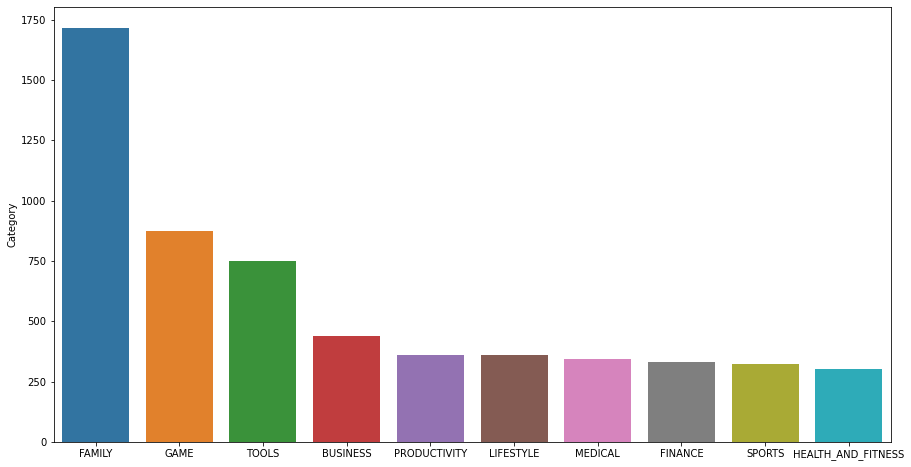

In [321]:
#Top 10 categories in free apps
plt.figure(figsize=(15, 8))
sns.barplot(free_apps.Category.value_counts().head(10).index, free_apps.Category.value_counts().head(10))

In [396]:
free_apps["Content Rating"].value_counts()["Everyone"]/free_apps.shape[0]

0.8097139773340529

D:\Anaconda3\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:ylabel='Content Rating'>

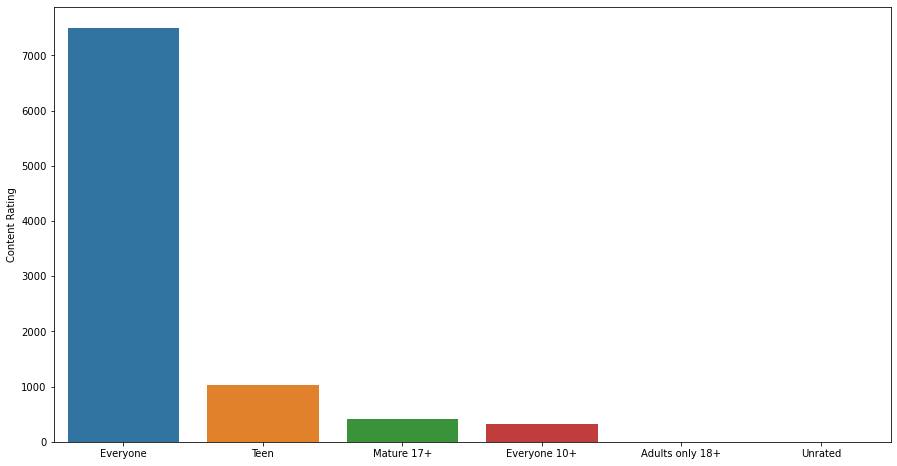

In [324]:
plt.figure(figsize=(15, 8))
sns.barplot(free_apps["Content Rating"].value_counts().index, free_apps["Content Rating"].value_counts())

### Most of the free apps are targetted to everyone

D:\Anaconda3\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:ylabel='Genres'>

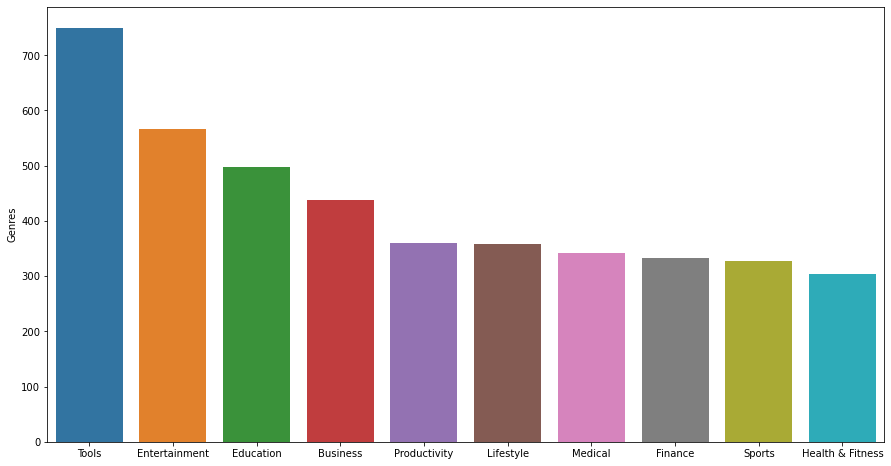

In [328]:
plt.figure(figsize=(15, 8))
sns.barplot(free_apps.Genres.value_counts().head(10).index, free_apps.Genres.value_counts().head(10))

### What is the most popular category? Which category has the most installs

In [355]:
top_category = free_apps.groupby('Category')[['Installs']].sum().sort_values('Installs', ascending=False).head(10)
top_category

,Installs
Category,
COMMUNICATION,15811916201
GAME,15473924450
TOOLS,8011044474
PRODUCTIVITY,7294679314
FAMILY,6407991691
SOCIAL,6038861902
PHOTOGRAPHY,4802268915
VIDEO_PLAYERS,3931831720
TRAVEL_AND_LOCAL,3181704086


D:\Anaconda3\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:xlabel='Category', ylabel='Installs'>

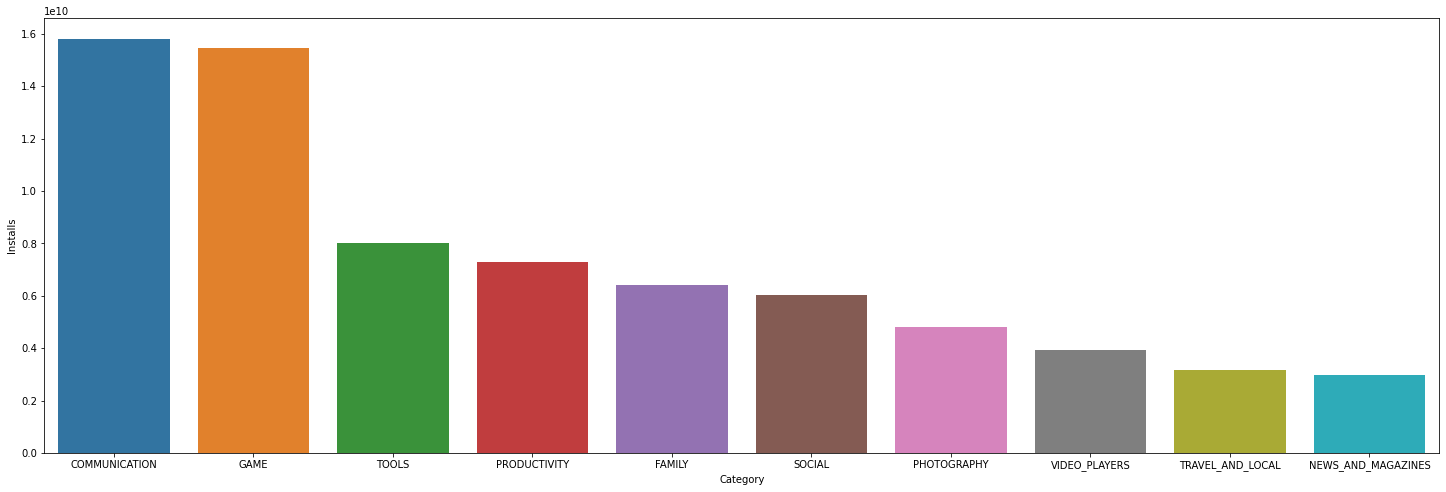

In [365]:
plt.figure(figsize=(25, 8))
sns.barplot(top_category.index, top_category.Installs)

In [359]:
top_app_installs = free_apps.groupby('App')[['Installs']].sum().sort_values('Installs', ascending=False).head(10)
top_app_installs

,Installs
App,
Skype - free IM & video calls,3000000000
WhatsApp Messenger,2000000000
Subway Surfers,2000000000
Google Drive,2000000000
Google News,1000000000
Twitter,1000000000
Google,1000000000
Google Chrome: Fast & Secure,1000000000
Candy Crush Saga,1000000000


D:\Anaconda3\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:xlabel='App', ylabel='Installs'>

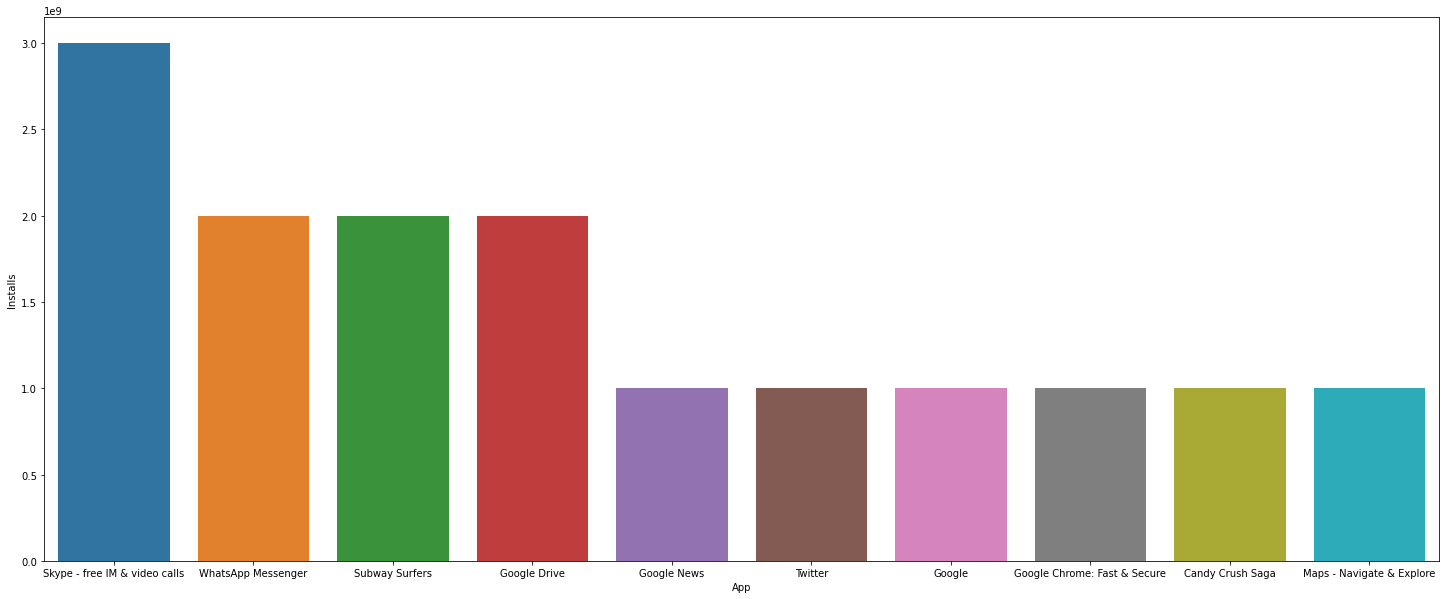

In [364]:
plt.figure(figsize=(25, 10))
sns.barplot(top_app_installs.index, top_app_installs.Installs)

In [367]:
len(free_apps.Category.value_counts())

33

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32]),
 [Text(0, 0, 'ART_AND_DESIGN'),
  Text(1, 0, 'AUTO_AND_VEHICLES'),
  Text(2, 0, 'BEAUTY'),
  Text(3, 0, 'BOOKS_AND_REFERENCE'),
  Text(4, 0, 'BUSINESS'),
  Text(5, 0, 'COMICS'),
  Text(6, 0, 'COMMUNICATION'),
  Text(7, 0, 'DATING'),
  Text(8, 0, 'EDUCATION'),
  Text(9, 0, 'ENTERTAINMENT'),
  Text(10, 0, 'EVENTS'),
  Text(11, 0, 'FINANCE'),
  Text(12, 0, 'FOOD_AND_DRINK'),
  Text(13, 0, 'HEALTH_AND_FITNESS'),
  Text(14, 0, 'HOUSE_AND_HOME'),
  Text(15, 0, 'LIBRARIES_AND_DEMO'),
  Text(16, 0, 'LIFESTYLE'),
  Text(17, 0, 'GAME'),
  Text(18, 0, 'FAMILY'),
  Text(19, 0, 'MEDICAL'),
  Text(20, 0, 'SOCIAL'),
  Text(21, 0, 'SHOPPING'),
  Text(22, 0, 'PHOTOGRAPHY'),
  Text(23, 0, 'SPORTS'),
  Text(24, 0, 'TRAVEL_AND_LOCAL'),
  Text(25, 0, 'TOOLS'),
  Text(26, 0, 'PERSONALIZATION'),
  Text(27, 0, 'PRODUCTIVITY'),
  Text(28, 0, 'PARENTING'),
  Text(

<Figure size 3600x1440 with 0 Axes>

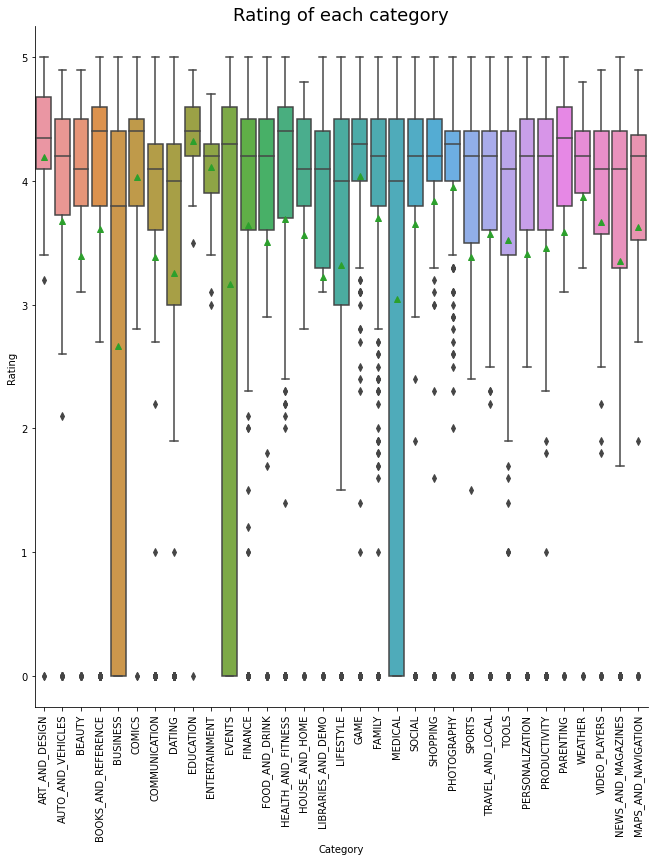

In [375]:
plt.figure(figsize=(50,20))
sns.catplot(x='Category',y='Rating',data=free_apps,kind='box',height=10,showmeans=True)
plt.title("Rating of each category", size=18)
plt.xticks(rotation=90)

In [376]:
categories = gplaystore_df["Category"].values

In [383]:
avg_rating = {}
for cat in categories:
    avg_rating[cat] = (gplaystore_df[gplaystore_df["Category"] == 'ART_AND_DESIGN']["Rating"].sum())/gplaystore_df["Category"].value_counts()[cat]

In [387]:
avg_rating_sorted = sorted(avg_rating.items(), key=lambda kv: kv[1], reverse=True)

In [388]:
avg_rating_sorted

[('BEAUTY', 4.852830188679245),
 ('COMICS', 4.5928571428571425),
 ('PARENTING', 4.286666666666666),
 ('ART_AND_DESIGN', 4.216393442622951),
 ('EVENTS', 4.01875),
 ('WEATHER', 3.2556962025316456),
 ('HOUSE_AND_HOME', 3.1753086419753087),
 ('LIBRARIES_AND_DEMO', 3.0619047619047617),
 ('AUTO_AND_VEHICLES', 3.0258823529411765),
 ('ENTERTAINMENT', 2.317117117117117),
 ('FOOD_AND_DRINK', 2.236521739130435),
 ('EDUCATION', 2.0251968503937006),
 ('MAPS_AND_NAVIGATION', 1.963358778625954),
 ('VIDEO_PLAYERS', 1.568292682926829),
 ('DATING', 1.2732673267326733),
 ('BOOKS_AND_REFERENCE', 1.1533632286995514),
 ('SHOPPING', 1.0944680851063828),
 ('TRAVEL_AND_LOCAL', 1.0898305084745763),
 ('SOCIAL', 1.0206349206349206),
 ('NEWS_AND_MAGAZINES', 0.9490774907749077),
 ('PHOTOGRAPHY', 0.8868965517241378),
 ('HEALTH_AND_FITNESS', 0.80375),
 ('COMMUNICATION', 0.7865443425076453),
 ('SPORTS', 0.7455072463768115),
 ('FINANCE', 0.7369627507163323),
 ('LIFESTYLE', 0.6804232804232804),
 ('PERSONALIZATION', 0.67

Text(0.5, 1.0, 'Box plot Rating VS Content Rating')

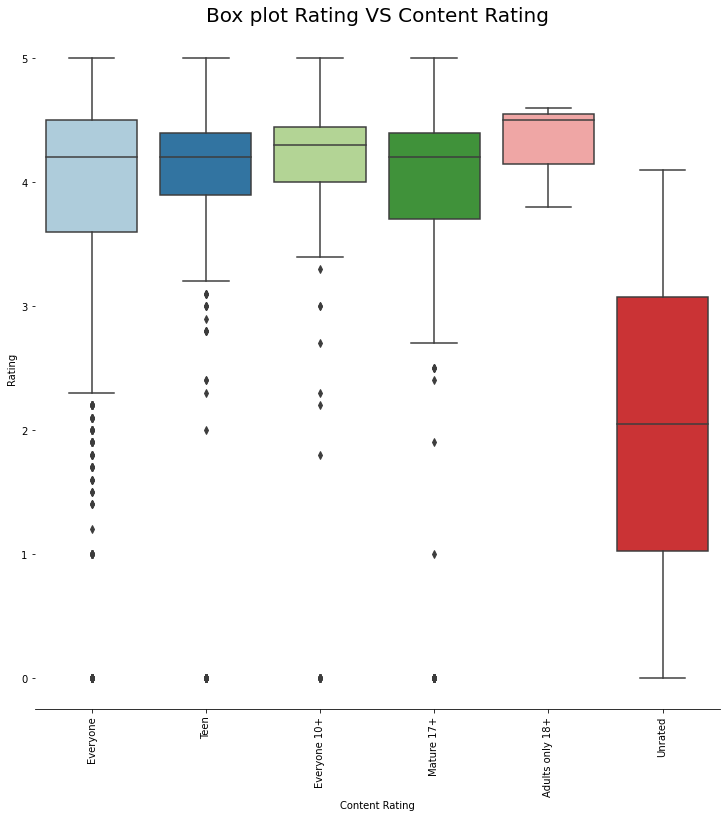

In [398]:
g = sns.catplot(x="Content Rating",y="Rating",data=free_apps, kind="box", height = 10 ,palette = "Paired")
g.despine(left=True)
g.set_xticklabels(rotation=90)
g = g.set_ylabels("Rating")
plt.title('Box plot Rating VS Content Rating',size = 20)

### We conclude with the following observations :
#### -> 92% of the apps are free, and 8% of them are paid
#### -> The most popular categories are Family, Games, Tools, Business, etc.
#### -> 80% of the free apps are made for everyone(Content Rating)
#### -> Most popular genres are Tools, Education, Entertainment.
#### -> Most installed apps are Communication, Games.
#### ->Content Rating not effect too much to rating, but in Mature applications ,look like they get lower rating than other.